In [51]:
# Import required libraries.
import  tensorflow as tf
import  keras

from    keras.models import Sequential
from    keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from    keras.utils import to_categorical
from    keras.callbacks import EarlyStopping

# Helper libraries.
import  numpy as np
import  sklearn
from    sklearn.model_selection import train_test_split

# Libraries for plotting.
import  matplotlib
import  matplotlib.pyplot as plt
from    PIL import Image
from    IPython.display import display

# Other
import gc

In [ ]:
# Import required libraries.
import  tensorflow as tf
import  keras

from    keras.models import Sequential
from    keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from    keras.utils import to_categorical
from    keras.callbacks import EarlyStopping

# Helper libraries.
import  numpy as np
import  sklearn
from    sklearn.model_selection import train_test_split

# Libraries for plotting.
import  matplotlib
import  matplotlib.pyplot as plt
from    PIL import Image
from    IPython.display import display

# Other
import gc

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
# Test for GPU and determine what GPU we have.
# Modified by student to remove warningen caused on local machine.

import sys
import os

IN_COLAB = 'google.colab' in sys.modules

if not tf.config.list_physical_devices('GPU'):
	print("No GPU was detected. CNNs can be very slow without a GPU.")
	if IN_COLAB:
		print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
else:
	os.system('nvidia-smi -L')

No GPU was detected. CNNs can be very slow without a GPU.


In [ ]:
gpu_devices = tf.config.list_physical_devices('GPU')

if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    compute_capability=details.get('compute_capability')
    print("Compute capability:",compute_capability)
    if compute_capability[0]>6:
        print("Turn on mixed_float16")
        policy = tf.keras.mixed_precision.Policy('mixed_float16')
        tf.keras.mixed_precision.set_global_policy(policy)
else:
    print("No GPU detected.")

No GPU detected.


In [ ]:
# Modify GPU memory allocator to try to prevent full GPU memory.
# This can in some cases be counter productive!
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

In [ ]:
# Install Keras Tuner via PIP (if in colab).
if IN_COLAB:
    os.system('pip install keras_tuner')

import keras_tuner
print('Keras Tuner version:', keras_tuner.__version__)

Keras Tuner version: 1.4.7


In [ ]:
import zipfile

# Function to load a ZIP file from Google Drive.
def load_zip_file(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Extract to a specific directory
            zip_ref.extractall('/content/Model/dataset')
            print(f"ZIP file '{zip_path}' loaded successfully.")
    except FileNotFoundError:
        print(f"Error: ZIP file not found at '{zip_path}'.")
    except zipfile.BadZipFile:
        print(f"Error: Invalid ZIP file at '{zip_path}'.")

# If in Colab, load the ZIP file from Google Drive.
if IN_COLAB:
    print("Loading and extracting dataset ZIP-file form Drive.")
    load_zip_file("drive/MyDrive/Studies/KTH/Courses/II143X/Model Creation/Data/output_frames.zip")
else:
    print("No Colab detected, using pre-existing files.")

extracted_path = "output_frames"

No Colab detected, using pre-existing files.


In [ ]:
"""
1. Extract the data from the dataset (The dataset is of format [ [x,y,z], [i,j,k]])
2. Use numpy to extract the data into a numpy array.
 
3.
"""
dataset_classes = []
dataset_array = []

# Loop class folders
for directory in os.listdir(extracted_path): 
    # Grab class folder path
    directory_path = os.path.join(extracted_path, directory)
    # Store class in array (same name as folder)
    dataset_classes.append(directory)
    # Prepare class entires array
    class_entires = []    
    # Loop files in class folder
    for file in os.listdir(directory_path):
        # Grab file path
        file_path = os.path.join(directory_path, file)
        with open(file_path, "r") as file_data:
            # Parsing the data into a list
            mfcc_txt = file_data.read()
            mfcc_data = np.array(eval(mfcc_txt)).T
            class_entires.append(mfcc_data)
    # Append class entires to dataset array
    dataset_array.append(class_entires)

In [ ]:
print(dataset_classes)
print(dataset_array[0])

['background_noise', 'bicycle', 'bus', 'car', 'motorcycle', 'truck']


KeyboardInterrupt: 

In [ ]:
import librosa

def plot_mfcc(mfccs):
    mfccs = mfccs
    librosa.display.specshow(mfccs, x_axis='time', sr=16000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficient')
    plt.show()

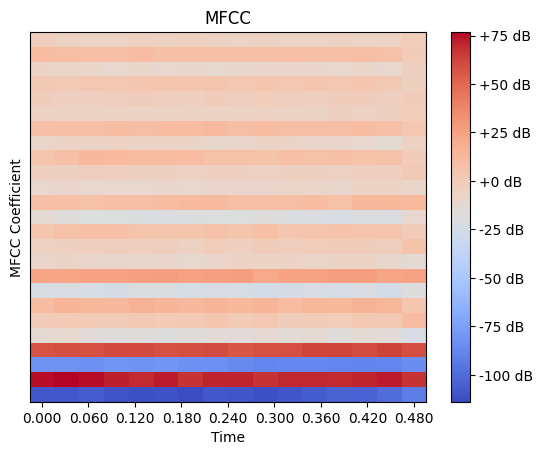

In [ ]:
#for i in range(0, dataset_array[0].__len__()):
#    plot_mfcc(dataset_array[0][i])
plot_mfcc(dataset_array[0][0])

In [ ]:
# Flatten the dataset array to a certain degree, but keep the inner 2D arrays holding MFCC.
X = np.concatenate(dataset_array, axis=0)
# Create labels for the dataset by copying the class index for each MFCC.
# [A,B,C] >> [A,A,A,B,B,B,C,C,C]
# [A,B,C] >> [G,G,G,B,B,B,G,G,G]

# Class 66 is background noise

Y = np.concatenate([[i] * len(c) for i, c in enumerate(dataset_array)])

# Split up the data into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, train_size=0.8)

num_classes = len(dataset_classes)

y_train_cat = to_categorical(y_train, num_classes = num_classes)
y_test_cat = to_categorical(y_test, num_classes = num_classes)

print(f"Train data shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train data shape: (21399, 25, 16)
Train labels shape: (21399,)
Test data shape: (5350, 25, 16)
Test labels shape: (5350,)


In [ ]:
print(y_train_cat.shape)

(21399, 6)


In [ ]:
print(f"Classes: {format(dataset_classes)}")

Classes: ['airplane', 'bicycle', 'bus', 'car', 'chainsaw', 'chirping_birds', 'dog', 'footsteps', 'insects', 'motorcycle', 'rain', 'thunderstorm', 'truck', 'water_drops', 'wind']


In [ ]:
# Add an "empty" color dimension for our data sets
x_train_extra_dim = np.expand_dims(x_train, -1)
y_train_extra_dim = np.expand_dims(y_train_cat, -1)

In [ ]:
print(len(dataset_classes))
print(x_train_extra_dim[0].shape)
print(y_train_extra_dim.shape)

6
(25, 16, 1)
(21399, 6, 1)


In [ ]:
print(x_train_extra_dim[0])

[[[-2.30555328e+02]
  [-2.36417999e+02]
  [-2.37352463e+02]
  [-2.32338654e+02]
  [-2.24062454e+02]
  [-1.94283829e+02]
  [-2.16915802e+02]
  [-2.25028732e+02]
  [-2.37512985e+02]
  [-2.35529083e+02]
  [-2.36207184e+02]
  [-2.33320511e+02]
  [-2.33083359e+02]
  [-2.31335159e+02]
  [-2.31645676e+02]
  [-2.27269272e+02]]

 [[ 6.84090500e+01]
  [ 6.98380890e+01]
  [ 7.03444290e+01]
  [ 7.16782150e+01]
  [ 7.07918780e+01]
  [ 7.26064830e+01]
  [ 6.84151690e+01]
  [ 6.93496170e+01]
  [ 7.08746720e+01]
  [ 7.42528690e+01]
  [ 7.31140370e+01]
  [ 7.24048460e+01]
  [ 7.41674350e+01]
  [ 7.21582410e+01]
  [ 7.66680150e+01]
  [ 8.05918350e+01]]

 [[-7.77693560e+01]
  [-7.54501190e+01]
  [-7.30998150e+01]
  [-7.53112180e+01]
  [-7.91232680e+01]
  [-1.00249451e+02]
  [-8.50895840e+01]
  [-7.90529480e+01]
  [-7.18343120e+01]
  [-6.98595730e+01]
  [-6.77852940e+01]
  [-7.04922940e+01]
  [-7.15243150e+01]
  [-7.76180570e+01]
  [-6.93165510e+01]
  [-6.93632130e+01]]

 [[ 4.70678330e+01]
  [ 4.35990870

In [ ]:
# Creation of the sequential model and all layers

input_shape = x_train_extra_dim[0].shape

sequential_model = Sequential([
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = input_shape, padding = 'same'),
    Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", input_shape = input_shape, padding = 'same'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.4),
    Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", input_shape = input_shape, padding = 'same'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dropout(0.6),
    Dense(units = num_classes, activation = "softmax")
])


In [ ]:
sequential_model.summary()

In [ ]:
sequential_model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])

In [ ]:
def printHistory(history):
  epochs = len(history.history['loss']) # Collect the number of epochs run based on the amount of loss value under history.

  epochrange = range(1, epochs + 1)
  train_acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.plot(epochrange, train_acc, 'bo', label='Training acc')
  plt.plot(epochrange, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy (modell 1)')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(epochrange, train_loss, 'bo', label='Training loss')
  plt.plot(epochrange, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss (modell 1)')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def fitModel(model, x, y, epochs, batch_size, validation_split, doPrintHistory):
    history = model.fit(
        x,
        y,
        epochs,
        batch_size, 
        verbose = 1,
        validation_split = validation_split,
        callbacks=EarlyStopping('val_loss', patience=3, restore_best_weights=True)
    )
    if doPrintHistory: printHistory(history)

Epoch 1/32
535/535 [==============================] - 9s 17ms/step - loss: 0.5892 - categorical_accuracy: 0.8051 - val_loss: 0.7411 - val_categorical_accuracy: 0.7554
Epoch 2/32
535/535 [==============================] - 9s 16ms/step - loss: 0.5712 - categorical_accuracy: 0.8156 - val_loss: 0.7736 - val_categorical_accuracy: 0.7451
Epoch 3/32
535/535 [==============================] - 9s 17ms/step - loss: 0.5444 - categorical_accuracy: 0.8229 - val_loss: 0.7164 - val_categorical_accuracy: 0.7685
Epoch 4/32
535/535 [==============================] - 10s 18ms/step - loss: 0.5208 - categorical_accuracy: 0.8261 - val_loss: 0.7364 - val_categorical_accuracy: 0.7640
Epoch 5/32
535/535 [==============================] - 9s 17ms/step - loss: 0.4964 - categorical_accuracy: 0.8359 - val_loss: 0.7620 - val_categorical_accuracy: 0.7563
Epoch 6/32
535/535 [==============================] - 9s 16ms/step - loss: 0.4724 - categorical_accuracy: 0.8440 - val_loss: 0.7259 - val_categorical_accuracy: 0.77

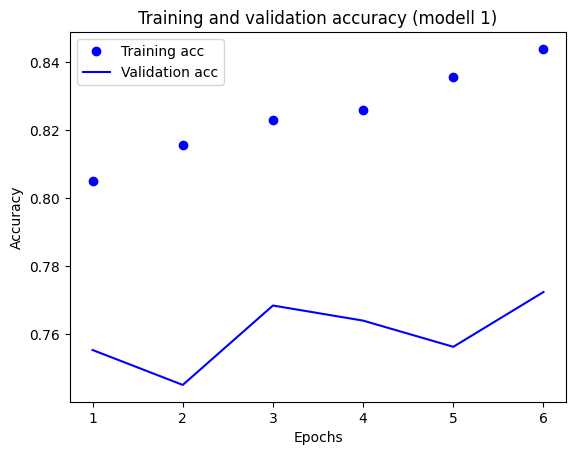

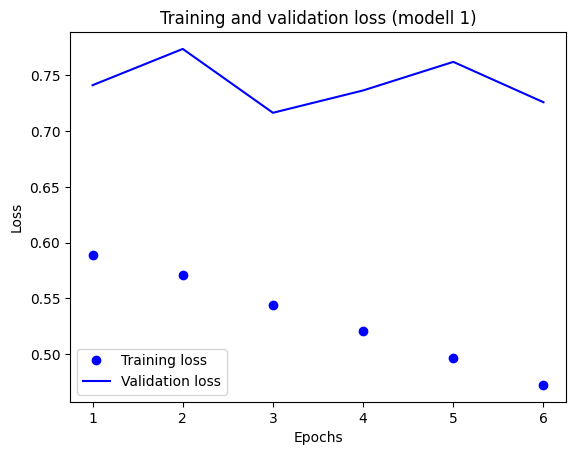

In [ ]:
fitModel(sequential_model, x_train_extra_dim, y_train_extra_dim, 32, 32, 0.2, True)